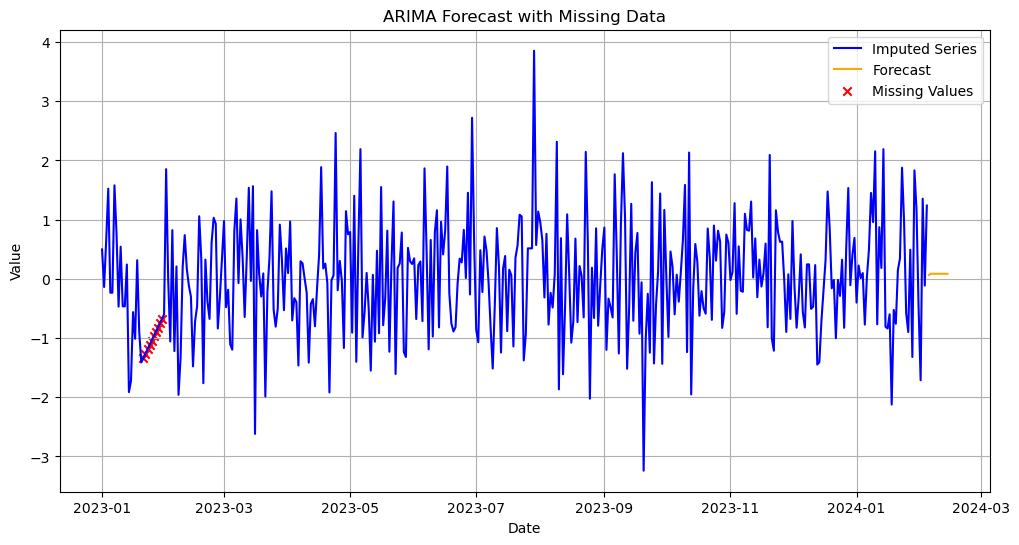

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from statsmodels.tsa.arima.model import ARIMA
import pickle

#logging configuration
logging.basicConfig(filename='arima_forecasting.log', level=logging.INFO)

def generate_synthetic_time_series(start_date='2023-01-01', n=400, freq='D', seed=42, missing_start=20, missing_end=30):
    """Synthetic time series data with missing values generation."""
    try:
        np.random.seed(seed)
        time_index = pd.date_range(start=start_date, periods=n, freq=freq)
        values = np.random.randn(n)
        values[missing_start:missing_end] = np.nan  # missing values
        return time_index, values
    except Exception as e:
        logging.error(f"Error in generating synthetic time series: {str(e)}")
        raise

def impute_missing_values(values):
    """Impute missing values using linear interpolation."""
    try:
        return pd.Series(values).interpolate()
    except Exception as e:
        logging.error(f"Error in imputing missing values: {str(e)}")
        raise

def fit_arima_model(data, order=(1, 1, 1)):
    """Define and fit ARIMA model."""
    try:
        model = ARIMA(data, order=order)
        return model.fit()
    except Exception as e:
        logging.error(f"Error in fitting ARIMA model: {str(e)}")
        raise

def forecast_future_values(model_results, forecast_steps=10):
    """Forecast future values."""
    try:
        return model_results.forecast(steps=forecast_steps)
    except Exception as e:
        logging.error(f"Error in forecasting future values: {str(e)}")
        raise

def plot_time_series(time_index, ts_imputed, forecast, missing_range):
    """Plot original, imputed, and forecasted series."""
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(time_index, ts_imputed, label='Imputed Series', color='blue')
        plt.plot(time_index[-1] + pd.timedelta_range(start='1D', periods=len(forecast)), forecast, label='Forecast', color='orange')
        plt.scatter(time_index[missing_range], ts_imputed[missing_range], label='Missing Values', color='red', marker='x')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title('ARIMA Forecast with Missing Data')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        logging.error(f"Error in plotting time series: {str(e)}")
        raise

try:
    # Synthetic time series data generation
    time_index, values = generate_synthetic_time_series()

    # Impute missing values
    ts_imputed = impute_missing_values(values)

    # Fit ARIMA model
    model_results = fit_arima_model(ts_imputed)

    # Forecast future values
    forecast = forecast_future_values(model_results)

    # missing range for plotting definition
    missing_range = slice(20, 30)

    # Plot time series data
    plot_time_series(time_index, ts_imputed, forecast, missing_range)

    # Serialize model for persistence
    with open('arima_model.pkl', 'wb') as f:
        pickle.dump(model_results, f)
    logging.info("ARIMA model saved successfully.")

except Exception as e:
    logging.error(f"Error in ARIMA time series forecasting: {str(e)}")
